In [2]:
"""
Scott Lewis
Machine Learning
Semester Project -- CNN
"""

'\nScott Lewis\nMachine Learning\nSemester Project -- CNN\n'

In [27]:
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing import image
from keras.initializers import Zeros, glorot_normal
from keras.regularizers import l1, l2, l1_l2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.initializers import RandomNormal
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten, Input

In [28]:
data_root = "../"
img_folder = data_root + 'images/'
train_data = pd.read_csv(data_root + 'data/train.csv')
train_ID = train_data['id']
train_Y = train_data['species']
test_data = pd.read_csv(data_root + 'data/test.csv')
test_ID = test_data['id']
le = LabelEncoder()
train_y = le.fit_transform(train_Y)

In [29]:
# write function to resize images for input
def resize_img(img, max_dim=96):
    large_axis = max((0, 1), key=lambda x: img.size[x])
    scalar = max_dim / float(img.size[large_axis])
    resized = img.resize(
        (int(img.size[0] * scalar), int(img.size[1] * scalar)))
    return resized

# write function to load in the image data
def load_image_data(id_list, max_dim=96, center=True):
    X = np.empty((len(id_list), max_dim, max_dim, 1))
    for i, idnum in enumerate(id_list):
        x = image.load_img(
            (img_folder + str(idnum) + '.jpg'), grayscale=True)
        x = image.img_to_array(resize_img(x, max_dim=max_dim))
        height = x.shape[0]
        width = x.shape[1]
        if center:
            h1 = int((max_dim - height) / 2)
            h2 = h1 + height
            w1 = int((max_dim - width) / 2)
            w2 = w1 + width
        else:
            h1, w1 = 0, 0
            h2, w2 = (height, width)
        X[i, h1:h2, w1:w2, :] = x
    return np.around(X / 255.0)

In [31]:
def CNN(input_layer):
    dumb_ini = Zeros()
    glorot = glorot_normal()
    model = Sequential()
    model.add(Convolution2D(8, (5, 5), input_shape=(96, 96, 1),
                      padding='same'))
    model.add((Activation('relu')))
    model.add((MaxPooling2D(pool_size=(2, 2), strides=(2, 2))))

    # Now through the second convolutional layer
    model.add((Convolution2D(32, (5, 5), padding='same')))
    model.add((Activation('relu')))
    model.add((MaxPooling2D(pool_size=(2, 2), strides=(2, 2))))

    # Flatten our array
    model.add(Flatten())
    model.add(Dense(1024, init=glorot, activation='relu',kernel_regularizer= l2(0.1)))
    model.add(Dropout(0.5))

    model.add(Dense(99, init=glorot, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(99, activation='softmax'))
    model.summary()
    return model

In [32]:
input_layer = Input(shape=(96, 96, 1), name='image')
model = CNN(input_layer)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
n_epoch = 1000
train_X = load_image_data(train_ID)
train_y = to_categorical(train_y)
history = model.fit(train_X, train_y, epochs=n_epoch, batch_size=128, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 96, 96, 8)         208       
_________________________________________________________________
activation_9 (Activation)    (None, 96, 96, 8)         0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 48, 48, 32)        6432      
_________________________________________________________________
activation_10 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18432)             0         
__________

792/792 [==============================] - 4s - loss: 2.3038 - acc: 0.7525 - val_loss: 2.8920 - val_acc: 0.6313
Epoch 116/1000
792/792 [==============================] - 4s - loss: 2.2844 - acc: 0.7765 - val_loss: 2.8098 - val_acc: 0.6414
Epoch 117/1000
792/792 [==============================] - 4s - loss: 2.2074 - acc: 0.7500 - val_loss: 2.7291 - val_acc: 0.5758
Epoch 118/1000
792/792 [==============================] - 4s - loss: 2.1070 - acc: 0.7677 - val_loss: 2.6940 - val_acc: 0.5960
Epoch 119/1000
792/792 [==============================] - 4s - loss: 2.1407 - acc: 0.7475 - val_loss: 2.7704 - val_acc: 0.5859
Epoch 120/1000
792/792 [==============================] - 4s - loss: 2.1310 - acc: 0.7652 - val_loss: 2.6886 - val_acc: 0.6263
Epoch 121/1000
792/792 [==============================] - 4s - loss: 2.0667 - acc: 0.7689 - val_loss: 2.8831 - val_acc: 0.5455
Epoch 122/1000
792/792 [==============================] - 4s - loss: 2.1641 - acc: 0.7437 - val_loss: 2.6670 - val_acc: 0.6111

792/792 [==============================] - 4s - loss: 1.9507 - acc: 0.8548 - val_loss: 2.9904 - val_acc: 0.5960
Epoch 244/1000
792/792 [==============================] - 4s - loss: 2.0359 - acc: 0.8447 - val_loss: 3.1075 - val_acc: 0.6010
Epoch 245/1000
792/792 [==============================] - 4s - loss: 2.0635 - acc: 0.8763 - val_loss: 3.0714 - val_acc: 0.6111
Epoch 246/1000
792/792 [==============================] - 4s - loss: 1.9447 - acc: 0.8775 - val_loss: 2.9544 - val_acc: 0.5859
Epoch 247/1000
792/792 [==============================] - 4s - loss: 1.8180 - acc: 0.8889 - val_loss: 2.7758 - val_acc: 0.6313
Epoch 248/1000
792/792 [==============================] - 4s - loss: 1.7632 - acc: 0.8851 - val_loss: 2.7468 - val_acc: 0.6364
Epoch 249/1000
792/792 [==============================] - 4s - loss: 1.7653 - acc: 0.8864 - val_loss: 2.6847 - val_acc: 0.6313
Epoch 250/1000
792/792 [==============================] - 4s - loss: 1.8386 - acc: 0.8712 - val_loss: 2.6938 - val_acc: 0.6111

792/792 [==============================] - 4s - loss: 1.6071 - acc: 0.8965 - val_loss: 2.7157 - val_acc: 0.6263
Epoch 372/1000
792/792 [==============================] - 4s - loss: 1.5611 - acc: 0.9154 - val_loss: 2.7302 - val_acc: 0.6263
Epoch 373/1000
792/792 [==============================] - 4s - loss: 1.5741 - acc: 0.8927 - val_loss: 2.7407 - val_acc: 0.6111
Epoch 374/1000
792/792 [==============================] - 4s - loss: 1.6180 - acc: 0.8813 - val_loss: 2.6712 - val_acc: 0.6515
Epoch 375/1000
792/792 [==============================] - 4s - loss: 1.6383 - acc: 0.8965 - val_loss: 2.9019 - val_acc: 0.5859
Epoch 376/1000
792/792 [==============================] - 4s - loss: 1.6813 - acc: 0.9028 - val_loss: 2.7637 - val_acc: 0.6414
Epoch 377/1000
792/792 [==============================] - 4s - loss: 1.6624 - acc: 0.9116 - val_loss: 2.7441 - val_acc: 0.6515
Epoch 378/1000
792/792 [==============================] - 4s - loss: 1.7161 - acc: 0.9078 - val_loss: 2.7459 - val_acc: 0.6566

792/792 [==============================] - 3s - loss: 1.6273 - acc: 0.9141 - val_loss: 2.8482 - val_acc: 0.6313
Epoch 500/1000
792/792 [==============================] - 4s - loss: 1.5413 - acc: 0.9306 - val_loss: 2.8153 - val_acc: 0.6263
Epoch 501/1000
792/792 [==============================] - 4s - loss: 1.5775 - acc: 0.9179 - val_loss: 2.8619 - val_acc: 0.6162
Epoch 502/1000
792/792 [==============================] - 4s - loss: 1.5626 - acc: 0.9192 - val_loss: 2.9612 - val_acc: 0.5808
Epoch 503/1000
792/792 [==============================] - 4s - loss: 1.5660 - acc: 0.9205 - val_loss: 2.8458 - val_acc: 0.6313
Epoch 504/1000
792/792 [==============================] - 4s - loss: 1.5880 - acc: 0.9053 - val_loss: 2.8923 - val_acc: 0.6162
Epoch 505/1000
792/792 [==============================] - 4s - loss: 1.5557 - acc: 0.9242 - val_loss: 2.8329 - val_acc: 0.6313
Epoch 506/1000
792/792 [==============================] - 4s - loss: 1.5771 - acc: 0.9154 - val_loss: 2.7170 - val_acc: 0.6263

792/792 [==============================] - 4s - loss: 1.7283 - acc: 0.9268 - val_loss: 3.1754 - val_acc: 0.6010
Epoch 628/1000
792/792 [==============================] - 4s - loss: 1.7479 - acc: 0.9268 - val_loss: 3.1721 - val_acc: 0.6263
Epoch 629/1000
792/792 [==============================] - 3s - loss: 1.6938 - acc: 0.9318 - val_loss: 3.4036 - val_acc: 0.6162
Epoch 630/1000
792/792 [==============================] - 4s - loss: 1.7916 - acc: 0.9268 - val_loss: 3.3463 - val_acc: 0.6313
Epoch 631/1000
792/792 [==============================] - 4s - loss: 1.7650 - acc: 0.9293 - val_loss: 3.3194 - val_acc: 0.6212
Epoch 632/1000
792/792 [==============================] - 4s - loss: 1.7077 - acc: 0.9129 - val_loss: 3.2094 - val_acc: 0.6162
Epoch 633/1000
792/792 [==============================] - 4s - loss: 1.6170 - acc: 0.9268 - val_loss: 3.0358 - val_acc: 0.6364
Epoch 634/1000
792/792 [==============================] - 4s - loss: 1.6037 - acc: 0.9293 - val_loss: 3.1348 - val_acc: 0.6010

792/792 [==============================] - 4s - loss: 1.6150 - acc: 0.9280 - val_loss: 3.0235 - val_acc: 0.6364
Epoch 756/1000
792/792 [==============================] - 3s - loss: 1.5934 - acc: 0.9407 - val_loss: 3.0088 - val_acc: 0.6515
Epoch 757/1000
792/792 [==============================] - 3s - loss: 1.5500 - acc: 0.9432 - val_loss: 2.9927 - val_acc: 0.5960
Epoch 758/1000
792/792 [==============================] - 4s - loss: 1.5287 - acc: 0.9495 - val_loss: 3.0451 - val_acc: 0.6162
Epoch 759/1000
792/792 [==============================] - 4s - loss: 1.5997 - acc: 0.9255 - val_loss: 3.0563 - val_acc: 0.6111
Epoch 760/1000
792/792 [==============================] - 4s - loss: 1.6906 - acc: 0.9318 - val_loss: 3.0580 - val_acc: 0.6313
Epoch 761/1000
792/792 [==============================] - 4s - loss: 1.6839 - acc: 0.9508 - val_loss: 3.1521 - val_acc: 0.6111
Epoch 762/1000
792/792 [==============================] - 4s - loss: 1.7184 - acc: 0.9268 - val_loss: 3.2195 - val_acc: 0.5909

792/792 [==============================] - 4s - loss: 1.4227 - acc: 0.9381 - val_loss: 2.9329 - val_acc: 0.6111
Epoch 884/1000
792/792 [==============================] - 4s - loss: 1.3687 - acc: 0.9457 - val_loss: 2.9835 - val_acc: 0.6162
Epoch 885/1000
792/792 [==============================] - 4s - loss: 1.3555 - acc: 0.9495 - val_loss: 3.1530 - val_acc: 0.6263
Epoch 886/1000
792/792 [==============================] - 4s - loss: 1.4305 - acc: 0.9444 - val_loss: 3.1007 - val_acc: 0.6414
Epoch 887/1000
792/792 [==============================] - 4s - loss: 1.4608 - acc: 0.9331 - val_loss: 2.9495 - val_acc: 0.6263
Epoch 888/1000
792/792 [==============================] - 4s - loss: 1.4170 - acc: 0.9394 - val_loss: 2.9245 - val_acc: 0.6162
Epoch 889/1000
792/792 [==============================] - 4s - loss: 1.3512 - acc: 0.9508 - val_loss: 2.9243 - val_acc: 0.6263
Epoch 890/1000
792/792 [==============================] - 4s - loss: 1.3575 - acc: 0.9419 - val_loss: 2.9135 - val_acc: 0.5909

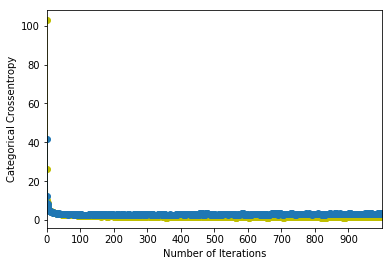

In [39]:
## Plotting the error with the number of iterations
## With each iteration the error reduces smoothly
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.plot(history.history['loss'],'yo-', history.history['val_loss'],'o-')
plt.xticks(np.arange(0, 1000, 100.0))
ax1.set_xlabel('Number of Iterations')
ax1.set_ylabel('Categorical Crossentropy')
ax1.set_xlim(xmin=1, xmax=1000)
#ax1.legend((ax1,ax2), ("train_loss", "val_loss"))
plt.show()

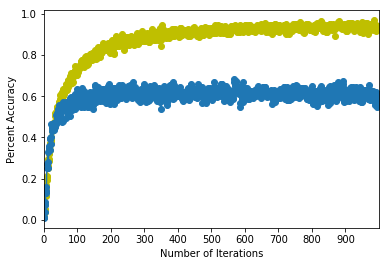

In [37]:
fig, ax1 = plt.subplots()
ax1.plot(history.history['acc'],'yo-', history.history['val_acc'],'o-')
plt.xticks(np.arange(0, 1000, 100.0))
ax1.set_xlabel('Number of Iterations')
ax1.set_ylabel('Percent Accuracy')
ax1.set_xlim(xmin=1, xmax=1000)
#ax1.legend((ax1,ax2), ("train_acc", "val_acc"))
plt.show()

In [ ]:
fig.savefig("CNN_Glorot_relu.png",format='png',dpi=300)